In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('北京空气质量及天气情况缺失版.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df

,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3_8h,天气状况,气温,风力风向
日期,,,,,,,,,,,
2013-12-02,142,轻度污染,109,138,61,2.6,88,11,多云/多云,11℃/-1℃,无持续风向≤3级/无持续风向≤3级
2013-12-03,86,良,64,86,38,1.6,54,45,晴/晴,14℃/-1℃,无持续风向≤3级/无持续风向≤3级
2013-12-04,109,轻度污染,82,101,42,2.0,62,23,多云/多云,12℃/0℃,无持续风向≤3级/无持续风向≤3级
2013-12-05,56,良,39,56,30,1.2,38,52,晴/晴,12℃/-3℃,无持续风向≤3级/无持续风向≤3级
2013-12-06,169,中度污染,128,162,48,2.5,78,15,晴/霾,11℃/-2℃,无持续风向≤3级/无持续风向≤3级
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,110,轻度污染,19,56,3,0.4,29,170,雷阵雨/多云,30℃/16℃,西南风4-5级/西南风4-5级
2020-06-02,99,良,23,74,2,0.3,25,158,晴/晴,32℃/21℃,南风3-4级/南风3-4级
2020-06-03,134,轻度污染,42,218,2,0.3,32,141,浮尘/晴,34℃/19℃,北风3-4级/北风3-4级


In [80]:
# 查看缺失值
k1 = df.isnull().sum()
k1.sort_values(ascending=False, inplace=True)
k1

AQI      0
质量等级     0
PM2.5    0
PM10     0
SO2      0
CO       0
NO2      0
O3_8h    0
天气状况     0
气温       0
风力风向     0
dtype: int64

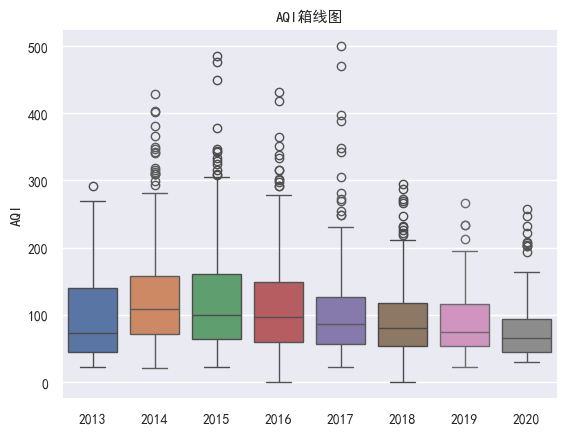

In [81]:
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(font_scale=0.9,rc=rc)

plt.title('AQI箱线图')
sns.boxplot(x=2013, y=df['2013':'2013']['AQI'])
sns.boxplot(x=2014, y=df['2014':'2014']['AQI'])
sns.boxplot(x=2015, y=df['2015':'2015']['AQI'])
sns.boxplot(x=2016, y=df['2016':'2016']['AQI'])
sns.boxplot(x=2017, y=df['2017':'2017']['AQI'])
sns.boxplot(x=2018, y=df['2018':'2018']['AQI'])
sns.boxplot(x=2019, y=df['2019':'2019']['AQI'])
sns.boxplot(x=2020, y=df['2020':'2020']['AQI'])
plt.show()

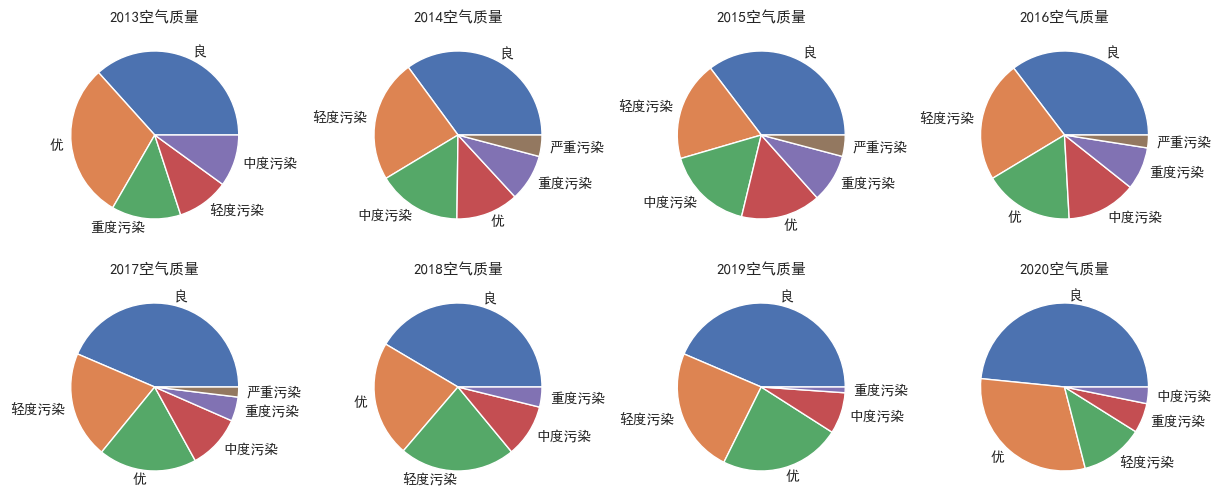

In [82]:
# 空气质量等级分布图
plt.figure(figsize=(15, 6))
plt.subplot(241, title='2013空气质量')
plt.pie(df['2013':'2013']['质量等级'].value_counts(), labels=df['2013':'2013']['质量等级'].value_counts().index)
plt.subplot(242, title='2014空气质量')
plt.pie(df['2014':'2014']['质量等级'].value_counts(), labels=df['2014':'2014']['质量等级'].value_counts().index)
plt.subplot(243, title='2015空气质量')
plt.pie(df['2015':'2015']['质量等级'].value_counts(), labels=df['2015':'2015']['质量等级'].value_counts().index)
plt.subplot(244, title='2016空气质量')
plt.pie(df['2016':'2016']['质量等级'].value_counts(), labels=df['2016':'2016']['质量等级'].value_counts().index) 
plt.subplot(245, title='2017空气质量')
plt.pie(df['2017':'2017']['质量等级'].value_counts(), labels=df['2017':'2017']['质量等级'].value_counts().index)
plt.subplot(246, title='2018空气质量')
plt.pie(df['2018':'2018']['质量等级'].value_counts(), labels=df['2018':'2018']['质量等级'].value_counts().index) 
plt.subplot(247, title='2019空气质量')
plt.pie(df['2019':'2019']['质量等级'].value_counts(), labels=df['2019':'2019']['质量等级'].value_counts().index)
plt.subplot(248, title='2020空气质量')
plt.pie(df['2020':'2020']['质量等级'].value_counts(), labels=df['2020':'2020']['质量等级'].value_counts().index) 
plt.show()

In [83]:
# 将气温拆分成最高气温和最低气温
df['最高气温'] = df['气温'].apply(lambda x :int(x.split('/')[0][0:-1]))
df['最低气温'] = df['气温'].apply(lambda x :int(x.split('/')[1][0:-1]))
df['平均气温'] = (df['最高气温'] + df['最低气温']) / 2
df.drop(columns=['气温'], inplace=True)

In [84]:
df.describe()

,AQI,PM2.5,PM10,SO2,CO,NO2,O3_8h,最高气温,最低气温,平均气温
count,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000
mean,104.869529,63.107744,88.452020,10.151936,1.029461,44.762626,97.181397,19.351010,8.205387,13.778199
std,66.402814,58.669509,66.323566,13.693335,0.830193,22.589649,62.899615,12.590009,10.941948,11.284626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000,-17.000000,-12.500000
25%,57.000000,23.750000,43.000000,3.000000,0.500000,29.000000,52.000000,8.000000,-3.000000,2.500000
50%,87.000000,46.000000,72.500000,5.000000,0.800000,40.000000,82.000000,20.000000,9.000000,14.500000
75%,137.000000,82.000000,115.000000,11.000000,1.200000,55.000000,138.000000,29.000000,19.000000,24.000000
max,500.000000,477.000000,550.000000,133.000000,8.000000,155.000000,311.000000,99.000000,27.000000,51.500000


In [85]:
# 将空气质量等级量化
set(df['质量等级'].values)

{'严重污染', '中度污染', '优', '良', '轻度污染', '重度污染'}

In [86]:
air_quality = {'严重污染': 5, '中度污染': 3, '优': 0, '良': 1, '轻度污染': 2, '重度污染': 4}
df['质量等级'] = df['质量等级'].map(air_quality)

In [87]:
weather = {elem:index for index,elem in enumerate(set(df['天气状况']))}
df['天气状况'] = df['天气状况'].map(weather)

wind = {elem:index for index,elem in enumerate(set(df['风力风向']))}
df['风力风向'] = df['风力风向'].map(wind)

In [88]:
df

,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3_8h,天气状况,风力风向,最高气温,最低气温,平均气温
日期,,,,,,,,,,,,,
2013-12-02,142,2,109,138,61,2.6,88,11,1,120,11,-1,5.0
2013-12-03,86,1,64,86,38,1.6,54,45,0,120,14,-1,6.5
2013-12-04,109,2,82,101,42,2.0,62,23,1,120,12,0,6.0
2013-12-05,56,1,39,56,30,1.2,38,52,0,120,12,-3,4.5
2013-12-06,169,3,128,162,48,2.5,78,15,4,120,11,-2,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,110,2,19,56,3,0.4,29,170,12,28,30,16,23.0
2020-06-02,99,1,23,74,2,0.3,25,158,0,17,32,21,26.5
2020-06-03,134,2,42,218,2,0.3,32,141,69,132,34,19,26.5


In [89]:
def draw_line_by_year(column='AQI'):
    plt.figure(figsize=(15, 6))
    plt.subplot(241)
    sns.lineplot(data=df['2013':'2013'][column])
    plt.subplot(242)
    sns.lineplot(data=df['2014':'2014'][column])
    plt.subplot(243)
    sns.lineplot(data=df['2015':'2015'][column])
    plt.subplot(244)
    sns.lineplot(data=df['2016':'2016'][column])
    plt.subplot(245)
    sns.lineplot(data=df['2017':'2017'][column])
    plt.subplot(246)
    sns.lineplot(data=df['2018':'2018'][column])
    plt.subplot(247)
    sns.lineplot(data=df['2019':'2019'][column])
    plt.subplot(248)
    sns.lineplot(data=df['2020':'2020'][column])
    plt.show()

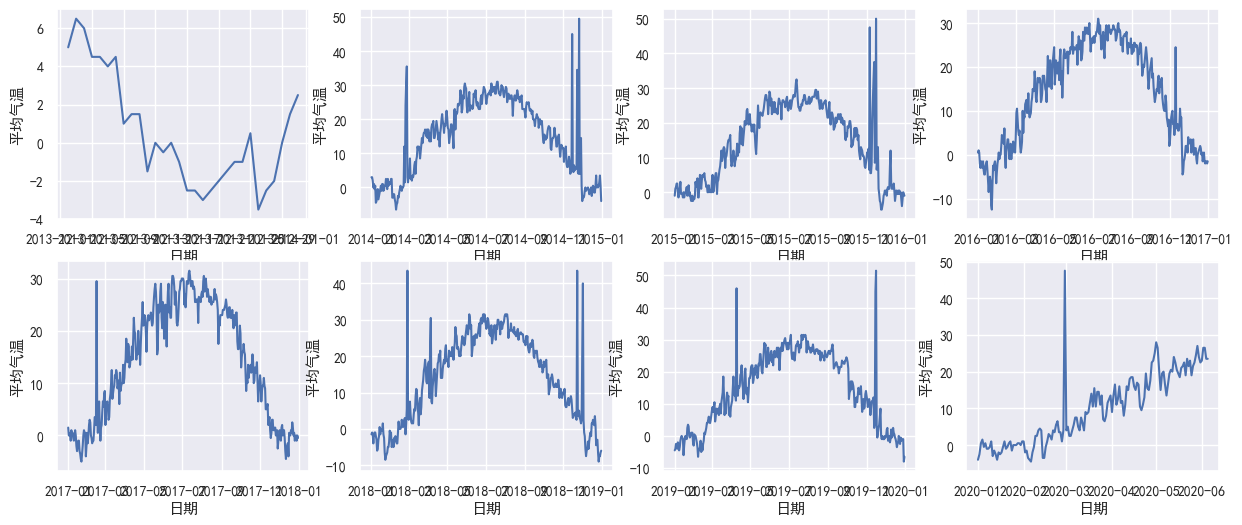

In [90]:
draw_line_by_year('平均气温')

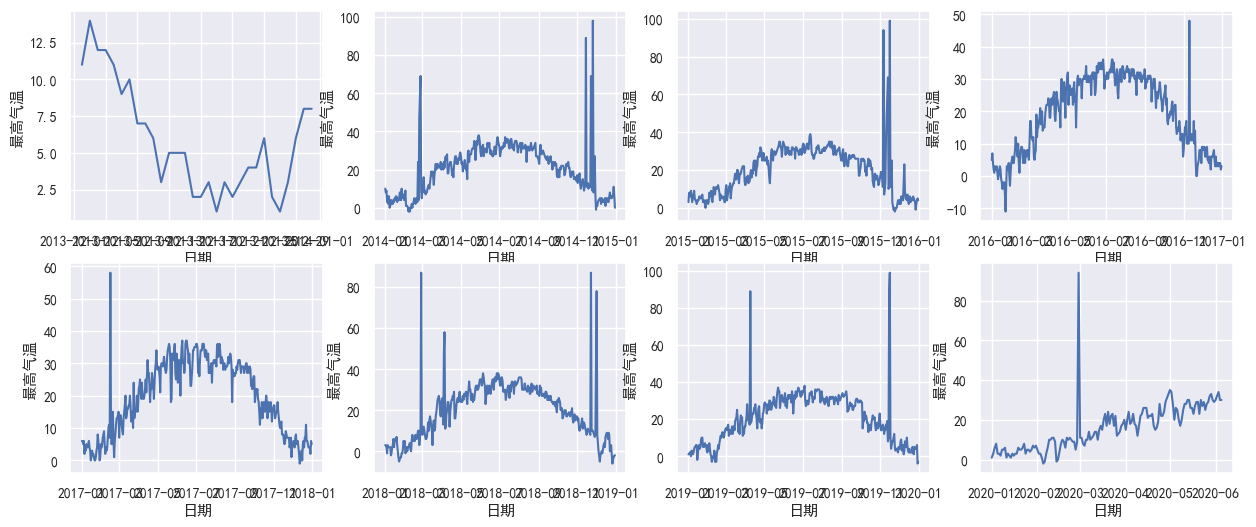

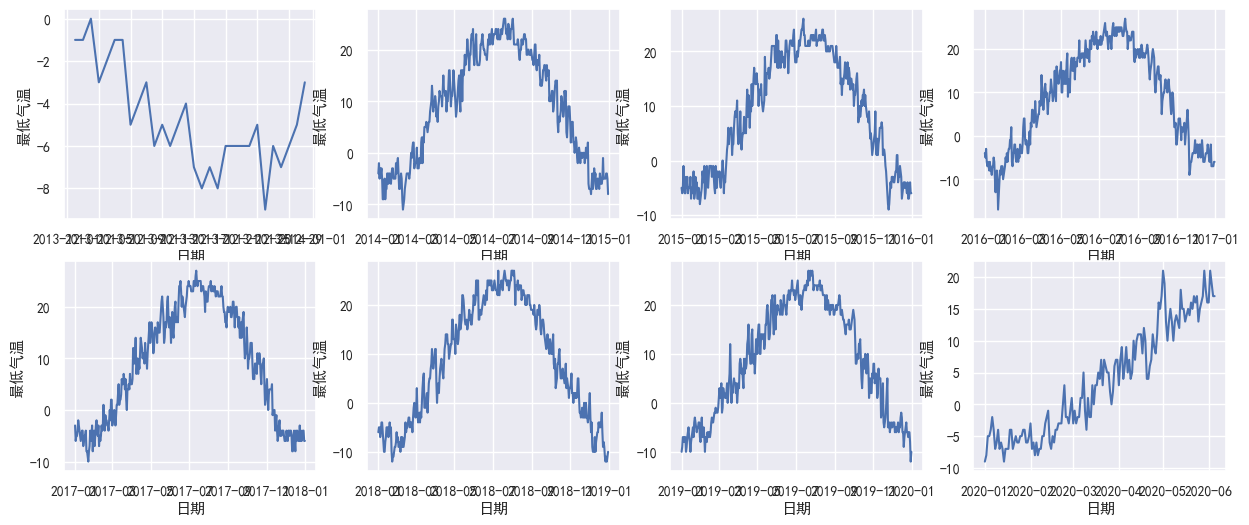

In [91]:
# 可以发现平均气温有明显异常值
# 绘制最低和最高气温进一步查看
# 最高气温折线图
draw_line_by_year('最高气温')
# 最低气温折线图
draw_line_by_year('最低气温')

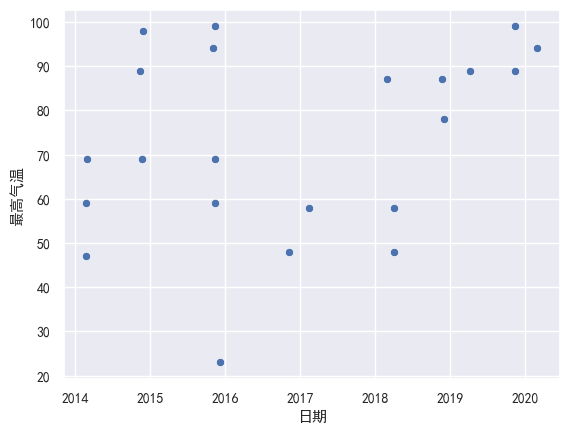

In [93]:
# 绘图，可以发现最高气温有明显的的异常值，使用相邻日期气温替代

# window_size 是用于计算平均值的窗口大小
# 计算每个日期前后窗口大小内的平均值和中位数
rolling_average = df['最高气温'].rolling(window=15, min_periods=1, center=True).mean()
rolling_median = df['最高气温'].rolling(window=15, min_periods=1, center=True).median()

# 找出异常值的索引
outliers = (df['最高气温'] - rolling_average) > 15

# 查看异常值，其中最低温度为2015年冬天，最高气温25度左右显然异常
sns.scatterplot(data=df.loc[outliers, '最高气温'])
plt.show()

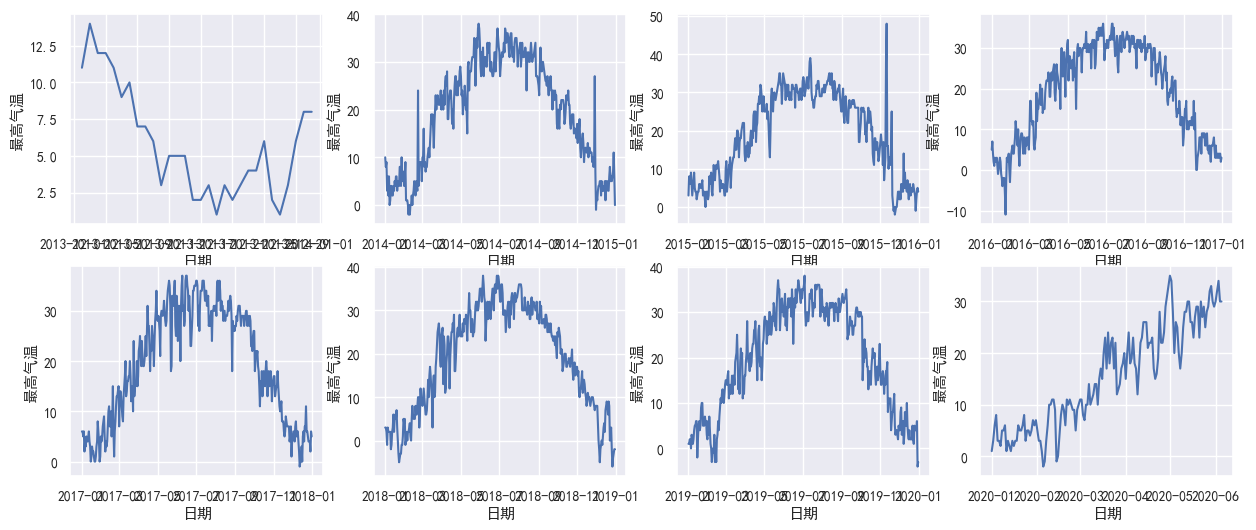

In [71]:
# 将异常值替换为相邻日期的中位数
df.loc[outliers, '最高气温'] = rolling_median[outliers].values
# 再次查看最高气温折线图
draw_line_by_year('最高气温')

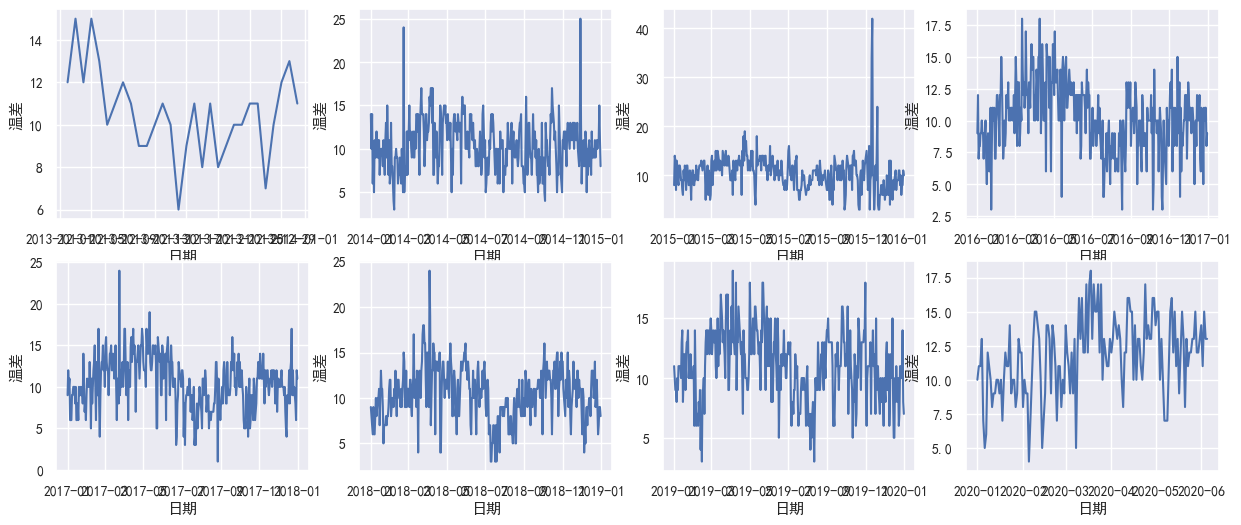

In [72]:
# 发现处理结果不太理想，对于2014及2015部分日期仍然有明显异常值
# 推测是很长时间（超过所设置15天窗口）的异常气温导致平均值和中位数都偏高
# 改用温差检测异常值
df['温差'] = df['最高气温'] - df['最低气温']
draw_line_by_year('温差')

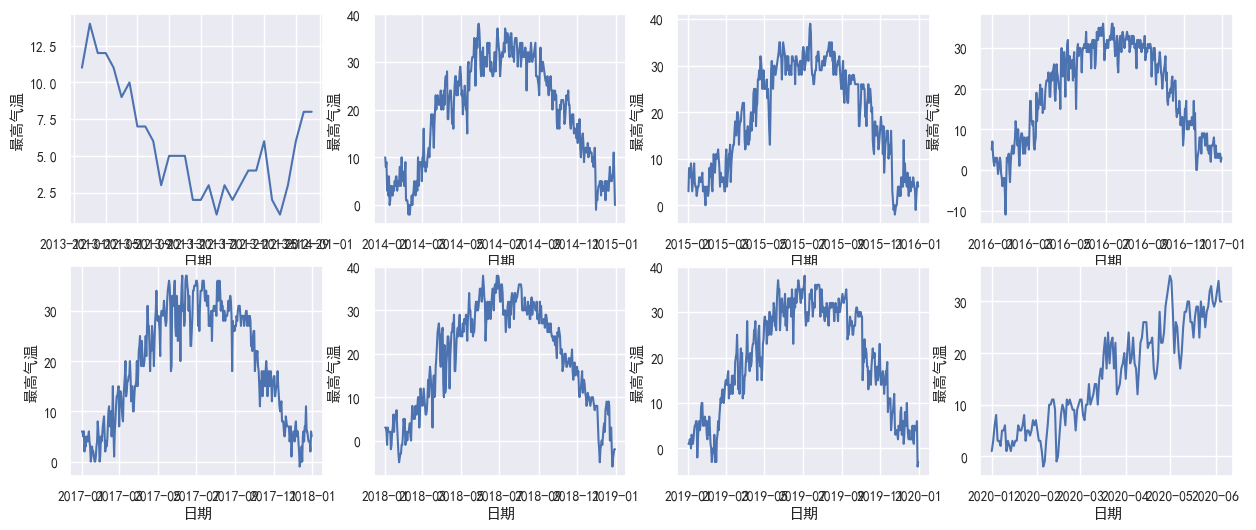

In [73]:
# 观察图像 将温差大于20的日期替换为最低气温+10
outliers = df['温差'] > 20
df.loc[outliers, '最高气温'] = df.loc[outliers, '最低气温'] + 10
draw_line_by_year('最高气温')

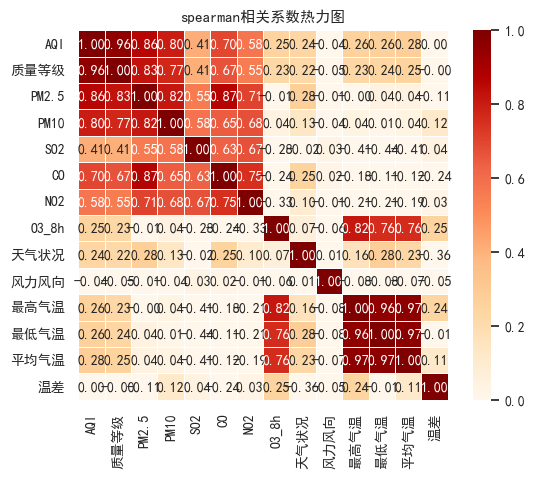

In [74]:
# AQI与其他数据的spearman相关系数
sprm = df.corr(method='spearman')
# print(stmk.sort_values(ascending=False))

plt.title('spearman相关系数热力图')
sns.heatmap(sprm,
            annot=True,  # 显示相关系数的数据
            center=0.5,  # 居中
            fmt='.2f',  # 只显示两位小数
            vmin=0, vmax=1,  # 设置数值最小值和最大值
            xticklabels=True, yticklabels=True,  # 显示x轴和y轴
            square=True,  # 每个方格都是正方形
            cbar=True,  # 绘制颜色条
            linewidths=.5,
            cmap="OrRd",        #刻度颜色
            annot_kws={"size": 10}
            )
plt.show()

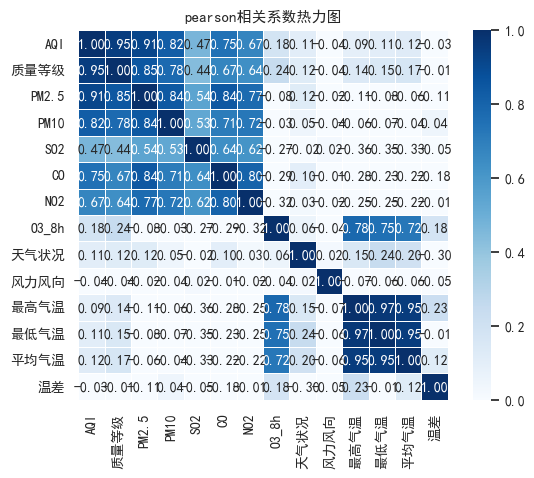

In [75]:
# AQI与其他数据的pearson相关系数
prs = df.corr(method='pearson')
# print(stmk.sort_values(ascending=False))

plt.title('pearson相关系数热力图')
sns.heatmap(prs,
            annot=True,  # 显示相关系数的数据
            center=0.5,  # 居中
            fmt='.2f',  # 只显示两位小数
            vmin=0, vmax=1,  # 设置数值最小值和最大值
            xticklabels=True, yticklabels=True,  # 显示x轴和y轴
            square=True,  # 每个方格都是正方形
            cbar=True,  # 绘制颜色条
            linewidths=.5,
            cmap="Blues",        #刻度颜色
            annot_kws={"size": 10}
            )
plt.show()